In [2]:
%pip install prophet


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 960.0 kB/s eta 0:00:14
   ---------------------------------------- 0.1/13.3 MB 1.1 MB/s eta 0:00:13
   ---------------------------------------- 0.1/13.3 MB 1.0 MB/s eta 0:00:13
    --------------------------------------- 0.3/13.3 MB 1.7 MB/s eta 0:00:08
   - -------------------------------------- 0.4/13.3 MB 1.8 MB/s eta 0:00:08
   - -------------------------------------- 0.5/13.3 MB 2.1 MB/s eta 0:00:07
   - -------------------------------------- 0.7/13.3 MB 2.2 MB/s eta 0:00:06
   -- ------------------------------------- 0.8/13.3 MB 2.4 MB/s eta 0:00:06
   -- ------------------------------------- 1.0/13.3 MB 2.5 MB/s eta 0:00:05
   --- ------------------------------------ 1.2/13.3 MB 2.6 MB/s eta 0:00:05
   --- ------------------------------------ 1.3/13.3 MB 2.7 MB/s eta 0:00:05
   ---- ----------------------------------- 1.4/13.3 MB 2.8 MB/s eta 0:00:05
   

00:28:01 - cmdstanpy - INFO - Chain [1] start processing
00:28:01 - cmdstanpy - INFO - Chain [1] done processing
00:28:01 - cmdstanpy - INFO - Chain [1] start processing
00:28:02 - cmdstanpy - INFO - Chain [1] done processing
00:28:02 - cmdstanpy - INFO - Chain [1] start processing
00:28:03 - cmdstanpy - INFO - Chain [1] done processing


Train MAE: 19.97
Train MSE: 922.21
Train R-squared: 1.00
Test MAE: 40.15
Test MSE: 1893.91
Test R-squared: 0.95
Train MAE: 0.01
Train MSE: 0.00
Train R-squared: 1.00
Test MAE: 0.01
Test MSE: 0.00
Test R-squared: 0.98
Train MAE: 0.24
Train MSE: 0.14
Train R-squared: 1.00
Test MAE: 0.20
Test MSE: 0.07
Test R-squared: 0.98
Etherium :


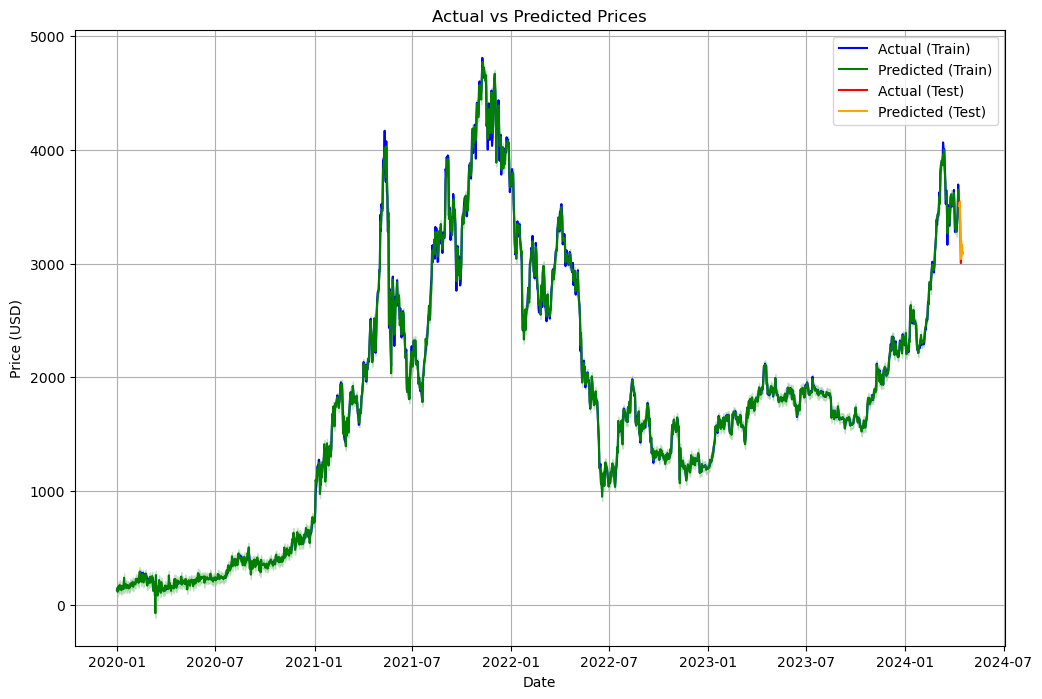

Arbitrum :


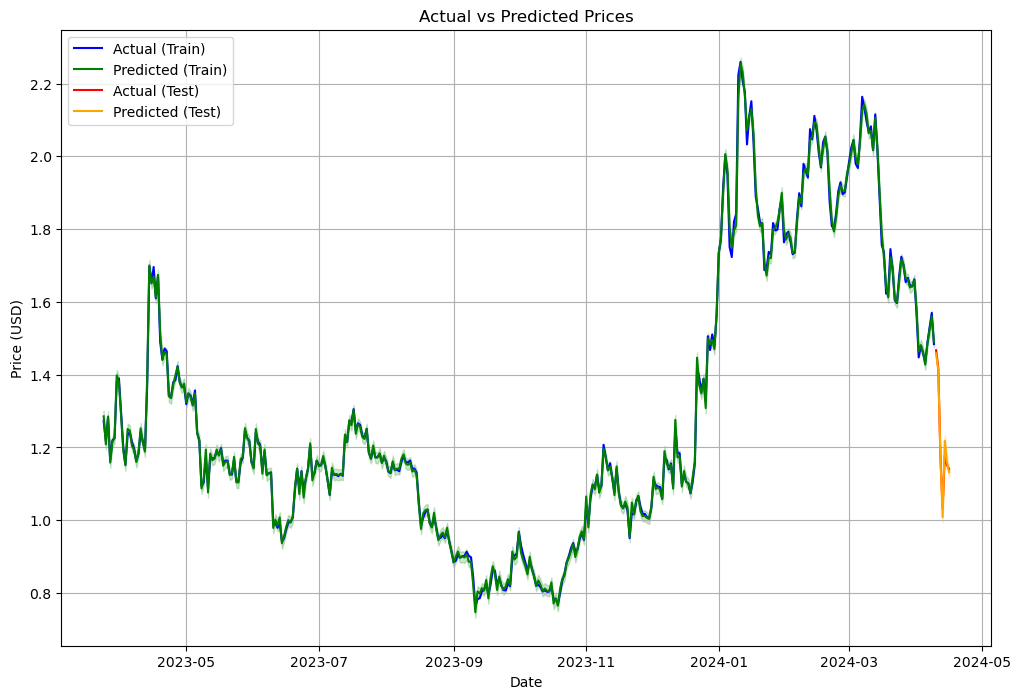

Chainlink :


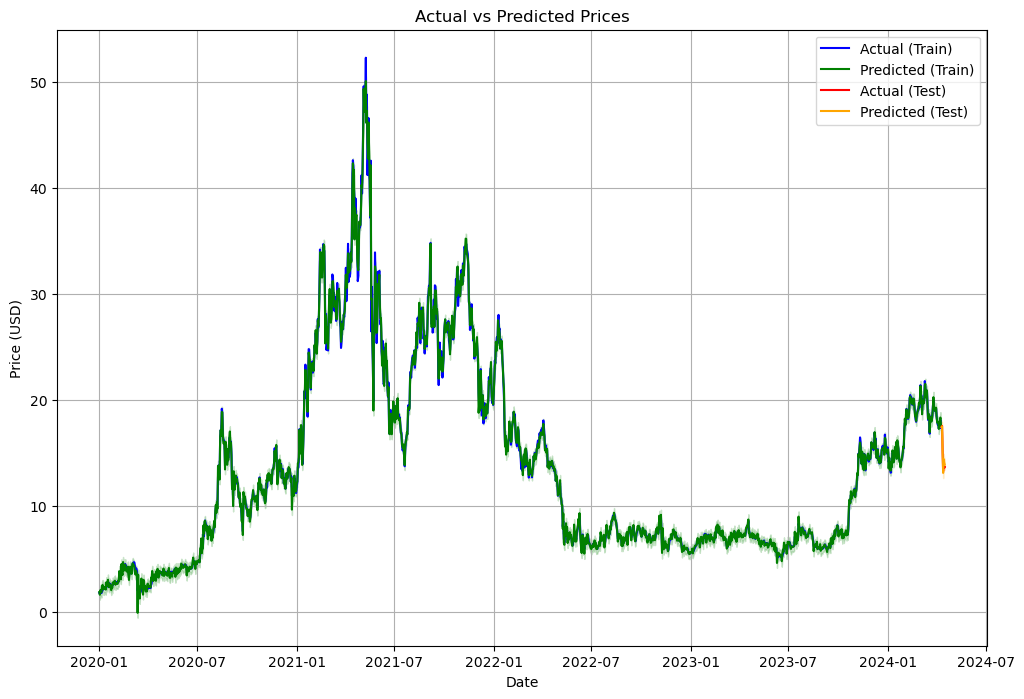

7-Day Ethereum Price Forecast:
             ds         yhat                  price_range
1568 2024-04-17  3086.019896  ETHPriceRanges.pr_3075_3100
1569 2024-04-18  3081.277647  ETHPriceRanges.pr_3075_3100
1570 2024-04-19  3085.238277  ETHPriceRanges.pr_3075_3100
1571 2024-04-20  3087.785285  ETHPriceRanges.pr_3075_3100
1572 2024-04-21  3092.879693  ETHPriceRanges.pr_3075_3100
1573 2024-04-22  3092.001799  ETHPriceRanges.pr_3075_3100
1574 2024-04-23  3092.249112  ETHPriceRanges.pr_3075_3100

7-Day Arbitrum Price Forecast:
            ds      yhat                price_range
390 2024-04-17  1.132795  ARBPriceRanges.pr_1_1_1_2
391 2024-04-18  1.127584  ARBPriceRanges.pr_1_1_1_2
392 2024-04-19  1.126073  ARBPriceRanges.pr_1_1_1_2
393 2024-04-20  1.128536  ARBPriceRanges.pr_1_1_1_2
394 2024-04-21  1.127436  ARBPriceRanges.pr_1_1_1_2
395 2024-04-22  1.130243  ARBPriceRanges.pr_1_1_1_2
396 2024-04-23  1.126655  ARBPriceRanges.pr_1_1_1_2

7-Day Chainlink Price Forecast:
             ds       yh

In [1]:
from enum import Enum
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import yfinance as yf

"""
For round 2, you have to predict ETH price in USD between Mar 16th and Feb 22nd 2024 (inclusive).
Each team will have to make 7 predictions; one for each day. The prediction has to be
within a range. Each range is inclusive of the lower bound and exclusive of the higher bound.
E.g. pr_2000_2025 is [2000, 2025).

Note: the price ranges might be updated closer to Mar 16.
Please copy the example to add your predictions.
We will call the predictions function on Feb Mar 16 12:00 AM PST. After that, the predictions
will not be altered.

We will take the closing price on the day as the correct price. The source for the closing
price will be https://coinmarketcap.com/currencies/ethereum/. Coin market cap provides
prices at 5 min intervals. We will take the price at 11:55 pm PST as the closing price.
"""
from enum import Enum


class ETHPriceRanges(Enum):
    pr_2000_2025 = 1
    pr_2025_2050 = 2
    pr_2050_2075 = 3
    pr_2075_2100 = 4
    pr_2100_2125 = 5
    pr_2125_2150 = 6
    pr_2150_2175 = 7
    pr_2175_2200 = 8
    pr_2200_2225 = 9
    pr_2225_2250 = 10
    pr_2250_2275 = 11
    pr_2275_2300 = 12
    pr_2300_2325 = 13
    pr_2325_2350 = 14
    pr_2350_2375 = 15
    pr_2375_2400 = 16
    pr_2400_2425 = 17
    pr_2425_2450 = 18
    pr_2450_2475 = 19
    pr_2475_2500 = 20
    pr_2500_2525 = 21
    pr_2525_2550 = 22
    pr_2550_2575 = 23
    pr_2575_2600 = 24
    pr_2600_2625 = 25
    pr_2625_2650 = 26
    pr_2650_2675 = 27
    pr_2675_2700 = 28
    pr_2700_2725 = 29
    pr_2725_2750 = 30
    pr_2750_2775 = 31
    pr_2775_2800 = 32
    pr_2800_2825 = 33
    pr_2825_2850 = 34
    pr_2850_2875 = 35
    pr_2875_2900 = 36
    pr_2900_2925 = 37
    pr_2925_2950 = 38
    pr_2950_2975 = 39
    pr_2975_3000 = 40
    pr_3000_3025 = 41
    pr_3025_3050 = 42
    pr_3050_3075 = 43
    pr_3075_3100 = 44
    pr_3100_3125 = 45
    pr_3125_3150 = 46
    pr_3150_3175 = 47
    pr_3175_3200 = 48
    pr_3200_3225 = 49
    pr_3225_3250 = 50
    pr_3250_3275 = 51
    pr_3275_3300 = 52
    pr_3300_3325 = 53
    pr_3325_3350 = 54
    pr_3350_3375 = 55
    pr_3375_3400 = 56
    pr_3400_3425 = 57
    pr_3425_3450 = 58
    pr_3450_3475 = 59
    pr_3475_3500 = 60
    pr_3500_3525 = 61
    pr_3525_3550 = 62
    pr_3550_3575 = 63
    pr_3575_3600 = 64
    pr_3600_3625 = 65
    pr_3625_3650 = 66
    pr_3650_3675 = 67
    pr_3675_3700 = 68
    pr_3700_3725 = 69
    pr_3725_3750 = 70
    pr_3750_3775 = 71
    pr_3775_3800 = 72
    pr_3800_3825 = 73
    pr_3825_3850 = 74
    pr_3850_3875 = 75
    pr_3875_3900 = 76
    pr_3900_3925 = 77
    pr_3925_3950 = 78
    pr_3950_3975 = 79
    pr_3975_4000 = 80

class ARBPriceRanges(Enum):
    pr_0_5_0_6 = 1
    pr_0_6_0_7 = 2
    pr_0_7_0_8 = 3
    pr_0_8_0_9 = 4
    pr_0_9_1_0 = 5
    pr_1_0_1_1 = 6
    pr_1_1_1_2 = 7
    pr_1_2_1_3 = 8
    pr_1_3_1_4 = 9
    pr_1_4_1_5 = 10
    pr_1_5_1_6 = 11
    pr_1_6_1_7 = 12
    pr_1_7_1_8 = 13
    pr_1_8_1_9 = 14
    pr_1_9_2_0 = 15
    pr_2_0_2_1 = 16
    pr_2_1_2_2 = 17
    pr_2_2_2_3 = 18
    pr_2_3_2_4 = 19
    pr_2_4_2_5 = 20
    pr_2_5_2_6 = 21
    pr_2_6_2_7 = 22
    pr_2_7_2_8 = 23
    pr_2_8_2_9 = 24
    pr_2_9_3_0 = 25    



class LINKPriceRanges(Enum):
    pr_4_6 = 1
    pr_6_8 = 2
    pr_8_10 = 3
    pr_10_12 = 4
    pr_12_14 = 5
    pr_14_16 = 6
    pr_16_18 = 7
    pr_18_20 = 8
    pr_20_22 = 9
    pr_22_24 = 10
    pr_24_26 = 11
    pr_26_28 = 12
    pr_28_30 = 13

def load_data(file_path):
    try:
        df = pd.read_csv(file_path, index_col='Date', parse_dates=['Date'], dayfirst=True)
        # Reversing the order of rows
        df = df.reindex(index=df.index[::-1])
        return df
    except ValueError as e:
        if 'NaN' in str(e):
            print(f"Error loading data from {file_path}: {e}")
            return None
        else:
            raise e

def prepare_data(df):
    if df is None:
        return None

    df_prophet = df.reset_index()
    df_prophet = df_prophet.rename(columns={'Date': 'ds', 'Price': 'y', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Vol.': 'volume', 'Change %': 'change_percent'})

    # Convert columns to the correct data types
    df_prophet['y'] = df_prophet['y'].astype(str).str.replace(',', '').astype(float)
    df_prophet['open'] = df_prophet['open'].astype(str).str.replace(',', '').astype(float)
    df_prophet['high'] = df_prophet['high'].astype(str).str.replace(',', '').astype(float)
    df_prophet['low'] = df_prophet['low'].astype(str).str.replace(',', '').astype(float)

    import re

    def convert_volume(value):
        if isinstance(value, str):
            if value.endswith('M'):
                return float(value[:-1]) * 1e6
            elif value.endswith('K'):
                return float(value[:-1]) * 1e3
            elif value.endswith('B'):
                return float(value[:-1]) * 1e9
            else:
                return float(value)
        else:
            return value

    df_prophet['volume'] = df_prophet['volume'].apply(convert_volume)
    df_prophet['change_percent'] = df_prophet['change_percent'].str.replace('%', '').str.replace(',', '').astype(float)
    return df_prophet

# Create the Prophet model
def create_model():
    model = Prophet(
        changepoint_prior_scale=40,
        holidays_prior_scale=10,
        seasonality_mode='multiplicative',
        seasonality_prior_scale=30,
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=True
    )
    model.add_country_holidays(country_name='US')
    model.add_regressor('open')
    model.add_regressor('high')
    model.add_regressor('low')
    model.add_regressor('volume')
    model.add_regressor('change_percent')
    return model

# Evaluate the model
def evaluate_model(df_prophet, model):
    if df_prophet is None:
        return None, None, None, None

    train_data = df_prophet[:-7]
    test_data = df_prophet[-7:]
    train_forecast = model.predict(train_data)
    test_forecast = model.predict(test_data)

    train_mae = mean_absolute_error(train_data['y'], train_forecast['yhat'])
    train_mse = mean_squared_error(train_data['y'], train_forecast['yhat'])
    train_r2 = r2_score(train_data['y'], train_forecast['yhat'])

    test_mae = mean_absolute_error(test_data['y'], test_forecast['yhat'])
    test_mse = mean_squared_error(test_data['y'], test_forecast['yhat'])
    test_r2 = r2_score(test_data['y'], test_forecast['yhat'])

    print(f"Train MAE: {train_mae:.2f}")
    print(f"Train MSE: {train_mse:.2f}")
    print(f"Train R-squared: {train_r2:.2f}")
    print(f"Test MAE: {test_mae:.2f}")
    print(f"Test MSE: {test_mse:.2f}")
    print(f"Test R-squared: {test_r2:.2f}")

    return train_data, test_data, train_forecast, test_forecast

# Make the forecast
def make_forecast(df_prophet, model, periods=7):
    if df_prophet is None:
        return None

    future = model.make_future_dataframe(periods=periods)
    future['open'] = df_prophet['open'].iloc[-1]
    future['high'] = df_prophet['high'].iloc[-1]
    future['low'] = df_prophet['low'].iloc[-1]
    future['volume'] = df_prophet['volume'].iloc[-1]
    future['change_percent'] = df_prophet['change_percent'].iloc[-1]
    forecast = model.predict(future)
    return forecast

# Plot the actual vs predicted data
def plot_actual_vs_predicted(train_data, test_data, train_forecast, test_forecast):
    if train_data is None or test_data is None or train_forecast is None or test_forecast is None:
        print("Not able to plot due to missing data.")
        return

    plt.figure(figsize=(12, 8))
    plt.plot(train_data['ds'], train_data['y'], label='Actual (Train)', color='blue')
    plt.plot(train_data['ds'], train_forecast['yhat'], label='Predicted (Train)', color='green')
    plt.plot(test_data['ds'], test_data['y'], label='Actual (Test)', color='red')
    plt.plot(test_data['ds'], test_forecast['yhat'], label='Predicted (Test)', color='orange')
    plt.fill_between(train_data['ds'], train_forecast['yhat_lower'], train_forecast['yhat_upper'], color='green', alpha=0.2)
    plt.fill_between(test_data['ds'], test_forecast['yhat_lower'], test_forecast['yhat_upper'], color='orange', alpha=0.2)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title('Actual vs Predicted Prices')
    plt.legend()
    plt.grid(True)
    plt.show()

def price_to_range(price):
    if 2000 <= price < 2025:
        return ETHPriceRanges.pr_2000_2025
    elif 2025 <= price < 2050:
        return ETHPriceRanges.pr_2025_2050
    elif 2050 <= price < 2075:
        return ETHPriceRanges.pr_2050_2075
    elif 2075 <= price < 2100:
        return ETHPriceRanges.pr_2075_2100
    elif 2100 <= price < 2125:
        return ETHPriceRanges.pr_2100_2125
    elif 2125 <= price < 2150:
        return ETHPriceRanges.pr_2125_2150
    elif 2150 <= price < 2175:
        return ETHPriceRanges.pr_2150_2175
    elif 2175 <= price < 2200:
        return ETHPriceRanges.pr_2175_2200
    elif 2200 <= price < 2225:
        return ETHPriceRanges.pr_2200_2225
    elif 2225 <= price < 2250:
        return ETHPriceRanges.pr_2225_2250
    elif 2250 <= price < 2275:
        return ETHPriceRanges.pr_2250_2275
    elif 2275 <= price < 2300:
        return ETHPriceRanges.pr_2275_2300
    elif 2300 <= price < 2325:
        return ETHPriceRanges.pr_2300_2325
    elif 2325 <= price < 2350:
        return ETHPriceRanges.pr_2325_2350
    elif 2350 <= price < 2375:
        return ETHPriceRanges.pr_2350_2375
    elif 2375 <= price < 2400:
        return ETHPriceRanges.pr_2375_2400
    elif 2400 <= price < 2425:
        return ETHPriceRanges.pr_2400_2425
    elif 2425 <= price < 2450:
        return ETHPriceRanges.pr_2425_2450
    elif 2450 <= price < 2475:
        return ETHPriceRanges.pr_2450_2475
    elif 2475 <= price < 2500:
        return ETHPriceRanges.pr_2475_2500
    elif 2500 <= price < 2525:
        return ETHPriceRanges.pr_2500_2525
    elif 2525 <= price < 2550:
        return ETHPriceRanges.pr_2525_2550
    elif 2550 <= price < 2575:
        return ETHPriceRanges.pr_2550_2575
    elif 2575 <= price < 2600:
        return ETHPriceRanges.pr_2575_2600
    elif 2600 <= price < 2625:
        return ETHPriceRanges.pr_2600_2625
    elif 2625 <= price < 2650:
        return ETHPriceRanges.pr_2625_2650
    elif 2650 <= price < 2675:
        return ETHPriceRanges.pr_2650_2675
    elif 2675 <= price < 2700:
        return ETHPriceRanges.pr_2675_2700
    elif 2700 <= price < 2725:
        return ETHPriceRanges.pr_2700_2725
    elif 2725 <= price < 2750:
        return ETHPriceRanges.pr_2725_2750
    elif 2750 <= price < 2775:
        return ETHPriceRanges.pr_2750_2775
    elif 2775 <= price < 2800:
        return ETHPriceRanges.pr_2775_2800
    elif 2800 <= price < 2825:
        return ETHPriceRanges.pr_2800_2825
    elif 2825 <= price < 2850:
        return ETHPriceRanges.pr_2825_2850
    elif 2850 <= price < 2875:
        return ETHPriceRanges.pr_2850_2875
    elif 2875 <= price < 2900:
        return ETHPriceRanges.pr_2875_2900
    elif 2900 <= price < 2925:
        return ETHPriceRanges.pr_2900_2925
    elif 2925 <= price < 2950:
        return ETHPriceRanges.pr_2925_2950
    elif 2950 <= price < 2975:
        return ETHPriceRanges.pr_2950_2975
    elif 2975 <= price < 3000:
        return ETHPriceRanges.pr_2975_3000
    elif 3000 <= price < 3025:
        return ETHPriceRanges.pr_3000_3025
    elif 3025 <= price < 3050:
        return ETHPriceRanges.pr_3025_3050
    elif 3050 <= price < 3075:
        return ETHPriceRanges.pr_3050_3075
    elif 3075 <= price < 3100:
        return ETHPriceRanges.pr_3075_3100
    elif 3100 <= price < 3125:
        return ETHPriceRanges.pr_3100_3125
    elif 3125 <= price < 3150:
        return ETHPriceRanges.pr_3125_3150
    elif 3150 <= price < 3175:
        return ETHPriceRanges.pr_3150_3175
    elif 3175 <= price < 3200:
        return ETHPriceRanges.pr_3175_3200
    elif 3200 <= price < 3225:
        return ETHPriceRanges.pr_3200_3225
    elif 3225 <= price < 3250:
        return ETHPriceRanges.pr_3225_3250
    elif 3250 <= price < 3275:
        return ETHPriceRanges.pr_3250_3275
    elif 3275 <= price < 3300:
        return ETHPriceRanges.pr_3275_3300
    elif 3300 <= price < 3325:
        return ETHPriceRanges.pr_3300_3325
    elif 3325 <= price < 3350:
        return ETHPriceRanges.pr_3325_3350
    elif 3350 <= price < 3375:
        return ETHPriceRanges.pr_3350_3375
    elif 3375 <= price < 3400:
        return ETHPriceRanges.pr_3375_3400
    elif 3400 <= price < 3425:
        return ETHPriceRanges.pr_3400_3425
    elif 3425 <= price < 3450:
        return ETHPriceRanges.pr_3425_3450
    elif 3450 <= price < 3475:
        return ETHPriceRanges.pr_3450_3475
    elif 3475 <= price < 3500:
        return ETHPriceRanges.pr_3475_3500
    elif 3500 <= price < 3525:
        return ETHPriceRanges.pr_3500_3525
    elif 3525 <= price < 3550:
        return ETHPriceRanges.pr_3525_3550
    elif 3550 <= price < 3575:
        return ETHPriceRanges.pr_3550_3575
    elif 3575 <= price < 3600:
        return ETHPriceRanges.pr_3575_3600
    elif 3600 <= price < 3625:
        return ETHPriceRanges.pr_3600_3625
    elif 3625 <= price < 3650:
        return ETHPriceRanges.pr_3625_3650
    elif 3650 <= price < 3675:
        return ETHPriceRanges.pr_3650_3675
    elif 3675 <= price < 3700:
        return ETHPriceRanges.pr_3675_3700
    elif 3700 <= price < 3725:
        return ETHPriceRanges.pr_3700_3725
    elif 3725 <= price < 3750:
        return ETHPriceRanges.pr_3725_3750
    elif 3750 <= price < 3775:
        return ETHPriceRanges.pr_3750_3775
    elif 3775 <= price < 3800:
        return ETHPriceRanges.pr_3775_3800
    elif 3800 <= price < 3825:
        return ETHPriceRanges.pr_3800_3825
    elif 3825 <= price < 3850:
        return ETHPriceRanges.pr_3825_3850
    elif 3850 <= price < 3875:
        return ETHPriceRanges.pr_3850_3875
    elif 3875 <= price < 3900:
        return ETHPriceRanges.pr_3875_3900
    elif 3900 <= price < 3925:
        return ETHPriceRanges.pr_3900_3925
    elif 3925 <= price < 3950:
        return ETHPriceRanges.pr_3925_3950
    elif 3950 <= price < 3975:
        return ETHPriceRanges.pr_3950_3975
    elif 3975 <= price < 4000:
        return ETHPriceRanges.pr_3975_4000
    else:
        return None

def price_to_range_arb(price):
    if 0.7 <= price < 0.8:
        return ARBPriceRanges.pr_0_7_0_8
    elif 0.8 <= price < 0.9:
        return ARBPriceRanges.pr_0_8_0_9
    elif 0.9 <= price < 1.0:
        return ARBPriceRanges.pr_0_9_1_0
    elif 1.0 <= price < 1.1:
        return ARBPriceRanges.pr_1_0_1_1
    elif 1.1 <= price < 1.2:
        return ARBPriceRanges.pr_1_1_1_2
    elif 1.2 <= price < 1.3:
        return ARBPriceRanges.pr_1_2_1_3
    elif 1.3 <= price < 1.4:
        return ARBPriceRanges.pr_1_3_1_4
    elif 1.4 <= price < 1.5:
        return ARBPriceRanges.pr_1_4_1_5
    elif 1.5 <= price < 1.6:
        return ARBPriceRanges.pr_1_5_1_6
    elif 1.6 <= price < 1.7:
        return ARBPriceRanges.pr_1_6_1_7
    elif 1.7 <= price < 1.8:
        return ARBPriceRanges.pr_1_7_1_8
    elif 1.8 <= price < 1.9:
        return ARBPriceRanges.pr_1_8_1_9   
    elif 2.0 <= price < 2.1:
        return ARBPriceRanges.pr_2_0_2_1
    elif 2.1 <= price < 2.2:
        return ARBPriceRanges.pr_2_1_2_2
    elif 2.2 <= price < 2.3:
        return ARBPriceRanges.pr_2_2_2_3
    elif 2.3 <= price < 2.4:
        return ARBPriceRanges.pr_2_3_2_4
    elif 2.4 <= price < 2.5:
        return ARBPriceRanges.pr_2_4_2_5
    elif 2.5 <= price < 2.6:
        return ARBPriceRanges.pr_2_5_2_6
    elif 2.6 <= price < 2.7:
        return ARBPriceRanges.pr_2_6_2_7
    elif 2.7 <= price < 2.8:
        return ARBPriceRanges.pr_2_7_2_8
    elif 2.8 <= price < 2.9:
        return ARBPriceRanges.pr_2_8_2_9
    elif 2.9 <= price < 3.0:
        return ARBPriceRanges.pr_2_9_3_0      
    else:
        return None

def price_to_range_link(price):
    if 4 <= price < 6:
        return LINKPriceRanges.pr_4_6
    elif 6 <= price < 8:
        return LINKPriceRanges.pr_6_8
    elif 8 <= price < 10:
        return LINKPriceRanges.pr_8_10
    elif 10 <= price < 12:
        return LINKPriceRanges.pr_10_12
    elif 12 <= price < 14:
        return LINKPriceRanges.pr_12_14
    elif 14 <= price < 16:
        return LINKPriceRanges.pr_14_16
    elif 16 <= price < 18:
        return LINKPriceRanges.pr_16_18
    elif 18 <= price < 20:
        return LINKPriceRanges.pr_18_20
    elif 20 <= price < 22:
        return LINKPriceRanges.pr_20_22
    elif 22 <= price < 24:
        return LINKPriceRanges.pr_22_24
    elif 24 <= price < 26:
        return LINKPriceRanges.pr_24_26
    else:
        return None



def get_price_range(yhat_value):
    lower_bound = round(yhat_value / 50) * 50
    upper_bound = lower_bound + 60
    return f"{lower_bound}-{upper_bound}"

# Load and prepare data
ethereum_df = load_data('Ethereum Historical Data.csv')
if ethereum_df is not None:
    ethereum_df_prophet = prepare_data(ethereum_df)
else:
    ethereum_df_prophet = None

arbitrum_df = load_data('Arbitrum Historical Data.csv')
if arbitrum_df is not None:
    arbitrum_df_prophet = prepare_data(arbitrum_df)
else:
    arbitrum_df_prophet = None

chainlink_df = load_data('Chainlink Historical Data.csv')
if chainlink_df is not None:
    chainlink_df_prophet = prepare_data(chainlink_df)
else:
    chainlink_df_prophet = None

# Create and fit the models
ethereum_model = create_model()
ethereum_model.fit(ethereum_df_prophet)

arbitrum_model = create_model()
arbitrum_model.fit(arbitrum_df_prophet)

chainlink_model = create_model()
chainlink_model.fit(chainlink_df_prophet)

# Evaluate the models
ethereum_train_data, ethereum_test_data, ethereum_train_forecast, ethereum_test_forecast = evaluate_model(ethereum_df_prophet, ethereum_model)
arbitrum_train_data, arbitrum_test_data, arbitrum_train_forecast, arbitrum_test_forecast = evaluate_model(arbitrum_df_prophet, arbitrum_model)
chainlink_train_data, chainlink_test_data, chainlink_train_forecast, chainlink_test_forecast = evaluate_model(chainlink_df_prophet, chainlink_model)

# Make the forecasts
ethereum_forecast = make_forecast(ethereum_df_prophet, ethereum_model)
arbitrum_forecast = make_forecast(arbitrum_df_prophet, arbitrum_model)
chainlink_forecast = make_forecast(chainlink_df_prophet, chainlink_model)

# Plot the actual vs predicted data
print("Etherium :")
plot_actual_vs_predicted(ethereum_train_data, ethereum_test_data, ethereum_train_forecast, ethereum_test_forecast)
print("Arbitrum :")
plot_actual_vs_predicted(arbitrum_train_data, arbitrum_test_data, arbitrum_train_forecast, arbitrum_test_forecast)
print("Chainlink :")
plot_actual_vs_predicted(chainlink_train_data, chainlink_test_data, chainlink_train_forecast, chainlink_test_forecast)

# Display the 7-day forecasts
if ethereum_forecast is not None:
    print("7-Day Ethereum Price Forecast:")
    ethereum_forecast['price_range'] = ethereum_forecast['yhat'].apply(price_to_range)
    print(ethereum_forecast[['ds', 'yhat', 'price_range']][-7:])

if arbitrum_forecast is not None:
    print("\n7-Day Arbitrum Price Forecast:")
    arbitrum_forecast['price_range'] = arbitrum_forecast['yhat'].apply(price_to_range_arb)
    print(arbitrum_forecast[['ds', 'yhat', 'price_range']][-7:])

if chainlink_forecast is not None:
    print("\n7-Day Chainlink Price Forecast:")
    chainlink_forecast['price_range'] = chainlink_forecast['yhat'].apply(price_to_range_link)
    print(chainlink_forecast[[ 'ds','yhat', 'price_range']][-7:])
